문제2-1) Multiclass 데이터에 대한 로지스틱 회귀 모델을 구축하라.

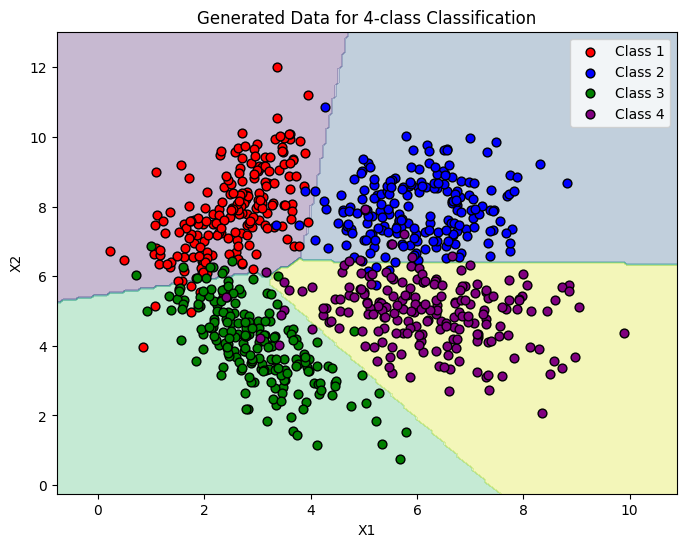

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

# 1. CSV 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multivariate_data.csv')

# 2. 데이터 병합
Xs, ys = [], []
for i in range(1, 5):
    Xi = df[[f'C{i}_X1', f'C{i}_X2']].values
    yi = np.full(Xi.shape[0], i)
    Xs.append(Xi)
    ys.append(yi)
X = np.vstack(Xs)
y = np.hstack(ys)

# 3. One-vs-One 로지스틱 회귀 학습
base_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
model = OneVsOneClassifier(base_clf)
model.fit(X, y)

# 4. 결정 경계 시각화
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)

# --- 여기부터 legend용 scatter 그리기 ---
colors = ['red', 'blue', 'green', 'purple']
for cls, col in zip(range(1,5), colors):
    pts = X[y == cls]
    plt.scatter(pts[:,0], pts[:,1],
                c=col, label=f'Class {cls}',
                edgecolor='k', s=40)
plt.legend(loc='upper right')
# ------------------------------------------

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Data for 4-class Classification')
plt.show()



문제2-2) 2-class 데이터에 대한 로지스틱 회귀 모델을 구축하라.

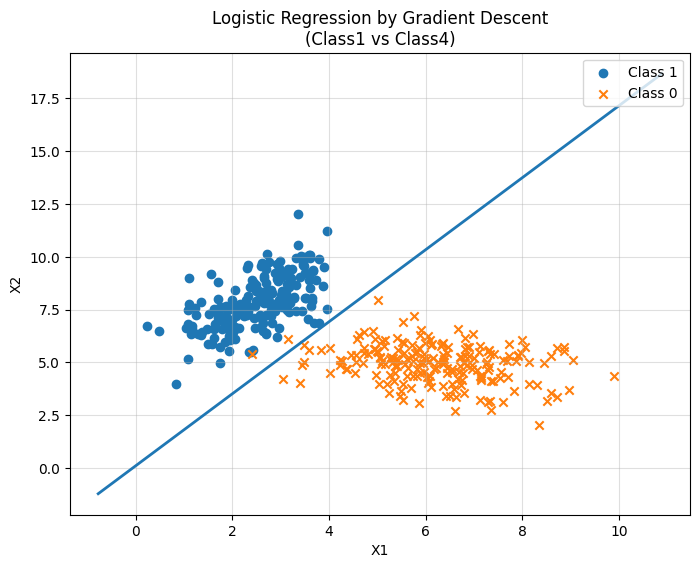

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. CSV 로드 (파일 경로에 맞게 수정하세요)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multivariate_data.csv')

# 2. Class1 → 레이블 1, Class4 → 레이블 0
X_pos = df[['C1_X1', 'C1_X2']].values
y_pos = np.ones(X_pos.shape[0])
X_neg = df[['C4_X1', 'C4_X2']].values
y_neg = np.zeros(X_neg.shape[0])

# 합치기
X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

# 3. 절편(바이어스) 항 추가
m, n = X.shape
X_bias = np.hstack([np.ones((m, 1)), X])  # shape = (m, 3)

# 4. 파라미터 초기화
w = np.zeros(n + 1)  # [w0, w1, w2]

# 5. 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 6. 경사하강법 하이퍼파라미터
lr = 0.01
epochs = 10000

# 7. 학습 루프
for _ in range(epochs):
    z = X_bias @ w                  # 선형 예측값
    preds = sigmoid(z)              # 확률 예측
    gradient = (X_bias.T @ (preds - y)) / m
    w -= lr * gradient              # 파라미터 업데이트

# 8. 시각화
plt.figure(figsize=(8, 6))

# 산점도: Class 1 (○), Class 0 (×)
plt.scatter(X_pos[:, 0], X_pos[:, 1], marker='o', label='Class 1')
plt.scatter(X_neg[:, 0], X_neg[:, 1], marker='x', label='Class 0')

# 결정 경계: w0 + w1*x + w2*y = 0  →  y = −(w0 + w1*x)/w2
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, linewidth=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression by Gradient Descent\n(Class1 vs Class4)')
plt.legend(loc='upper right')
plt.grid(alpha=0.4)
plt.show()
